In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [142]:
df = pd.read_csv("Meshed_Nodes.txt")
df.head()

,x,y,z
0,2.995757,0.002121,0.002121
1,0.003725,2.995473,0.000802
2,2.000518,0.002405,0.997077
3,0.001604,2.995473,0.002923
4,1.996275,0.004527,0.999198


In [247]:
print(1.0 / 3.0)
#top_nodes = df[(df['z'] > 0.3) & 
          #(df['z'] < 0.35)] 
#bot_nodes = df[(df['z'] < -0.3) & 
          #(df['z'] > -0.35)] 
top_nodes = df[(df['z'] > 0.999)]
bot_nodes = df[(df['z'] < -0.999)]
display(top_nodes.head())
display(top_nodes.index)

IndentationError: unexpected indent (645091811.py, line 3)

In [213]:
def make_torus(precision, c, a): # num points, size, thickness
    #variables to loop through
    U = np.linspace(0, 2*np.pi, precision)
    V = np.linspace(0, 2*np.pi, precision)
    u, v = np.meshgrid(U, V)
    
    #parametric eqs
    x = (c + a * np.cos(v)) * np.cos(u)
    y = (c + a * np.cos(v)) * np.sin(u)
    z = a * np.sin(v)

    return x, y, z

In [214]:
precision = 5
x, y, z = make_torus(precision, 2, 1)

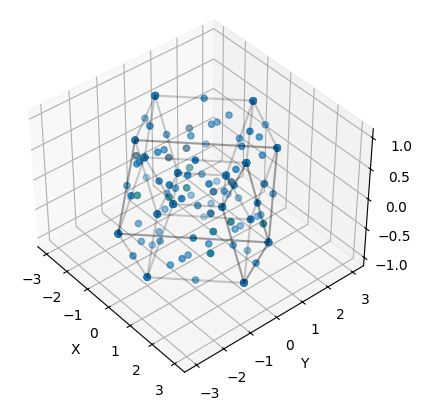

In [244]:
fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')

#going thru each ring
ax2.scatter(df['x'], df['y'], df['z'])

#going thru each ring
ax2.plot_wireframe(x, y, z, color='black',alpha=0.2)
ax2.scatter(top_nodes['x'], top_nodes['y'], top_nodes['z'])
ax2.scatter(bot_nodes['x'], bot_nodes['y'], bot_nodes['z'])

#plotting bs dw ab it
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=40., azim=-40, roll=0)
plt.show()

In [245]:
for i in range(0, top_nodes.index.size):
    print(str(top_nodes.index[i] + 1) + ",0,0,-loadForce;") 
    print(str(bot_nodes.index[i] + 1) + ",0,0,loadForce;") 

241,0,0,-loadForce;
249,0,0,loadForce;
243,0,0,-loadForce;
256,0,0,loadForce;
246,0,0,-loadForce;
257,0,0,loadForce;
248,0,0,-loadForce;
264,0,0,loadForce;
252,0,0,-loadForce;
266,0,0,loadForce;
254,0,0,-loadForce;
268,0,0,loadForce;
259,0,0,-loadForce;
270,0,0,loadForce;
262,0,0,-loadForce;
272,0,0,loadForce;


In [227]:
top_bars = df.loc[df['z'] > 0.99]
display(top_bars.head())
display(top_bars.index)

,x,y,z
2,2.000518,0.002405,0.997077
4,1.996275,0.004527,0.999198
5,0.002121,2.000000,0.997879
8,2.000518,-0.002405,0.997077
10,1.996275,-0.004527,0.999198


Index([  2,   4,   5,   8,  10,  11,  13,  14,  17,  19,  20,  23,  30,  31,
        33,  36,  37,  39,  54,  57,  58,  60,  61,  63,  97, 103, 106, 108,
       109, 110, 115, 118, 120, 121, 122, 124, 126, 127, 128, 133, 136, 138,
       139, 140, 156, 159, 162, 168, 171, 195, 201, 204],
      dtype='int64')

In [228]:
mid_bars = df.loc[df['z'] > 0.99]
display(mid_bars.head())
display(mid_bars.index)

,x,y,z
2,2.000518,0.002405,0.997077
4,1.996275,0.004527,0.999198
5,0.002121,2.000000,0.997879
8,2.000518,-0.002405,0.997077
10,1.996275,-0.004527,0.999198


Index([  2,   4,   5,   8,  10,  11,  13,  14,  17,  19,  20,  23,  30,  31,
        33,  36,  37,  39,  54,  57,  58,  60,  61,  63,  97, 103, 106, 108,
       109, 110, 115, 118, 120, 121, 122, 124, 126, 127, 128, 133, 136, 138,
       139, 140, 156, 159, 162, 168, 171, 195, 201, 204],
      dtype='int64')

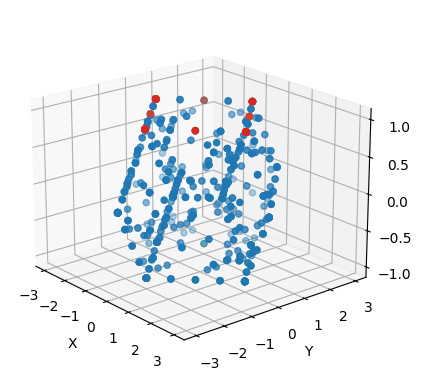

In [231]:
bars = pd.read_csv("Meshed_Bars.txt")

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')

#going thru each ring
ax2.scatter(bars['x'], bars['y'], bars['z'])

ax2.scatter(top_bars['x'], top_bars['y'], top_bars['z'])
ax2.scatter(bot_bars['x'], bot_bars['y'], bot_bars['z'])
ax2.scatter(mid_bars['x'], mid_bars['y'], mid_bars['z'])

#plotting bs dw ab it
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=20., azim=-40, roll=0)
plt.show()

,x,y,z
2,2.000518,0.002405,0.997077
4,1.996275,0.004527,0.999198
5,0.002121,2.000000,0.997879
8,2.000518,-0.002405,0.997077
10,1.996275,-0.004527,0.999198


Index([  2,   4,   5,   8,  10,  11,  13,  14,  17,  19,  20,  23,  30,  31,
        33,  36,  37,  39,  54,  57,  58,  60,  61,  63,  97, 103, 106, 108,
       109, 110, 115, 118, 120, 121, 122, 124, 126, 127, 128, 133, 136, 138,
       139, 140, 156, 159, 162, 168, 171, 195, 201, 204],
      dtype='int64')

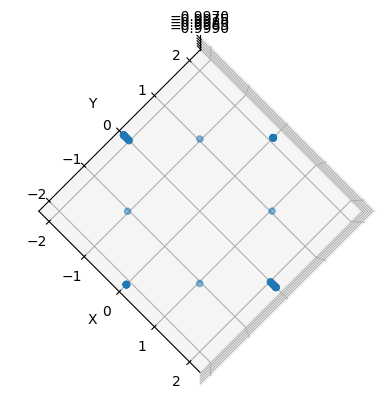

In [186]:
bot_bars = df.loc[df['z'] < -0.99]
display(top_bars.head())
display(top_bars.index)

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')

#going thru each ring

#plotting bs dw ab it
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=90., azim=-40, roll=0)
plt.show()

In [246]:
#here we print the supplemental bars?
for i in range(0, df.index.size):
    print(str(df.index[i] + 1) + ",1,1,1;")

1,1,1,1;
2,1,1,1;
3,1,1,1;
4,1,1,1;
5,1,1,1;
6,1,1,1;
7,1,1,1;
8,1,1,1;
9,1,1,1;
10,1,1,1;
11,1,1,1;
12,1,1,1;
13,1,1,1;
14,1,1,1;
15,1,1,1;
16,1,1,1;
17,1,1,1;
18,1,1,1;
19,1,1,1;
20,1,1,1;
21,1,1,1;
22,1,1,1;
23,1,1,1;
24,1,1,1;
25,1,1,1;
26,1,1,1;
27,1,1,1;
28,1,1,1;
29,1,1,1;
30,1,1,1;
31,1,1,1;
32,1,1,1;
33,1,1,1;
34,1,1,1;
35,1,1,1;
36,1,1,1;
37,1,1,1;
38,1,1,1;
39,1,1,1;
40,1,1,1;
41,1,1,1;
42,1,1,1;
43,1,1,1;
44,1,1,1;
45,1,1,1;
46,1,1,1;
47,1,1,1;
48,1,1,1;
49,1,1,1;
50,1,1,1;
51,1,1,1;
52,1,1,1;
53,1,1,1;
54,1,1,1;
55,1,1,1;
56,1,1,1;
57,1,1,1;
58,1,1,1;
59,1,1,1;
60,1,1,1;
61,1,1,1;
62,1,1,1;
63,1,1,1;
64,1,1,1;
65,1,1,1;
66,1,1,1;
67,1,1,1;
68,1,1,1;
69,1,1,1;
70,1,1,1;
71,1,1,1;
72,1,1,1;
73,1,1,1;
74,1,1,1;
75,1,1,1;
76,1,1,1;
77,1,1,1;
78,1,1,1;
79,1,1,1;
80,1,1,1;
81,1,1,1;
82,1,1,1;
83,1,1,1;
84,1,1,1;
85,1,1,1;
86,1,1,1;
87,1,1,1;
88,1,1,1;
89,1,1,1;
90,1,1,1;
91,1,1,1;
92,1,1,1;
93,1,1,1;
94,1,1,1;
95,1,1,1;
96,1,1,1;
97,1,1,1;
98,1,1,1;
99,1,1,1;
100,1,1,1;
101,1,1,